In [2]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import requests
from io import BytesIO
from PIL import Image
import numpy as np
import imgkit

In [3]:
from maskrcnn_benchmark.config import cfg
from my_depth_predictor import MyDepthDatasetDemo

In [4]:
# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 20, 12

In [5]:
config_file = "../output/my_processed_dataset_my_net/config.yml"

# update the config options with the config file
cfg.merge_from_file(config_file)
# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cuda"])

In [6]:
my_dataset_demo = MyDepthDatasetDemo(
    cfg,
    min_image_size=600,
    confidence_threshold=0.7,
    weight_loading = "../output/my_processed_dataset_my_net/model_0060000.pth"
)

Loading weight from ../output/my_processed_dataset_my_net/model_0060000.pth.


In [7]:
import IPython
from COCO_Image_Viewer import CocoDataset

annotation_path = "../maskrcnn_benchmark/data/datasets/my_dataset/data_set_test_imgs_processed_depth/trainval.json"
image_dir = "../maskrcnn_benchmark/data/datasets/my_dataset/data_set_test_imgs_processed_depth"

coco_dataset = CocoDataset(annotation_path, image_dir)

In [7]:
import IPython
from COCO_Image_Viewer import CocoDataset

annotation_path = "../maskrcnn_benchmark/data/datasets/my_dataset/data_set_imgs/trainval.json"
image_dir = "../maskrcnn_benchmark/data/datasets/my_dataset/data_set_imgs"

coco_dataset = CocoDataset(annotation_path, image_dir)

# Dataset info

In [8]:
coco_dataset.display_info()
coco_dataset.display_licenses()
coco_dataset.display_categories()

Dataset Info:
Licenses:
Categories:
  super_category: battery
    id 0: battery

  super_category: camera
    id 1: camera

  super_category: connector
    id 2: connector

  super_category: motherboard
    id 3: motherboard

  super_category: screw
    id 4: screw



In [9]:
def imshow(img):
    #plt.figure(figsize=(20,20))
    plt.imshow(img)
    plt.axis("off")

In [36]:
# from http://cocodtaset.org/#explore?id=345434
image_id = 16

image = Image.open("../maskrcnn_benchmark/data/datasets/my_dataset/data_set_test_imgs_processed_depth/" + coco_dataset.images[image_id]["file_name"])
image = np.array(image)

depth = Image.open("../maskrcnn_benchmark/data/datasets/my_dataset/data_set_test_imgs_processed_depth/" + coco_dataset.images[image_id]["file_name"].replace("color","depth"))
depth = np.array(depth)

html = coco_dataset.display_image(image_id, use_url=False)
IPython.display.HTML(html)

Image:
  height: 1200
  width: 1920
  id: 16
  file_name: 414_color.png
  segmentations (7):
    81:blue:{'supercategory': 'connector', 'id': 2, 'name': 'connector'}
    82:purple:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    83:red:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    84:green:{'supercategory': 'camera', 'id': 1, 'name': 'camera'}
    85:orange:{'supercategory': 'battery', 'id': 0, 'name': 'battery'}
    86:salmon:{'supercategory': 'connector', 'id': 2, 'name': 'connector'}
    87:pink:{'supercategory': 'connector', 'id': 2, 'name': 'connector'}


BoxList(num_boxes=1, image_width=1920, image_height=1200, mode=xyxy)
[1]
Labels =  ['battery']


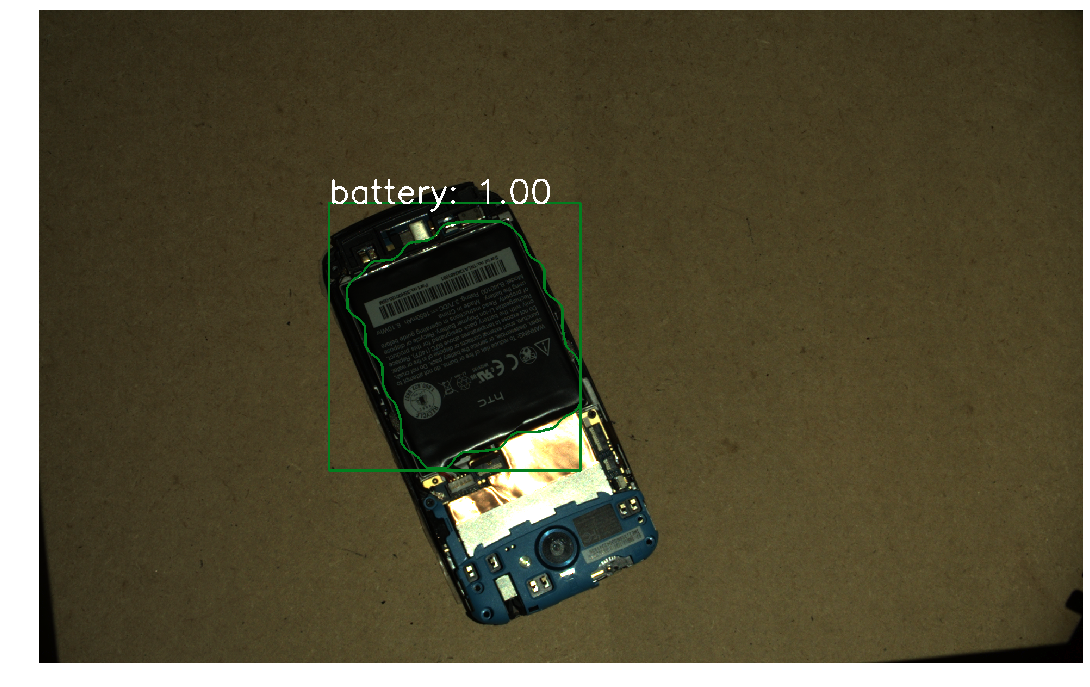

In [37]:
# compute predictions
predictions, r = my_dataset_demo.run_on_opencv_image(image, depth)
imshow(predictions)

In [18]:
predictions.shape

(480, 640, 3)

In [14]:
import IPython
from COCO_Image_Viewer import CocoDataset

annotation_path = "../maskrcnn_benchmark/data/datasets/my_dataset/resized_images/trainval.json"
image_dir = "../maskrcnn_benchmark/data/datasets/my_dataset/resized_images"

coco_dataset = CocoDataset(annotation_path, image_dir)


In [15]:
coco_dataset.display_info()
coco_dataset.display_licenses()
coco_dataset.display_categories()

Dataset Info:
Licenses:
Categories:
  super_category: battery
    id 0: battery

  super_category: camera
    id 1: camera

  super_category: connector
    id 2: connector

  super_category: motherboard
    id 3: motherboard

  super_category: screw
    id 4: screw



In [92]:
html = coco_dataset.display_image(image_id, use_url=False)
html = html.replace('img src="../', 'img src="/home/q/kashapov/maskrcnn-benchmark/')
imgkit.from_string(html, "ground_trouth_" + str(image_id) + ".png")

Image:
  height: 1200
  width: 1920
  id: 45
  file_name: 432_color.png
  segmentations (8):
    280:blue:{'supercategory': 'battery', 'id': 0, 'name': 'battery'}
    281:purple:{'supercategory': 'connector', 'id': 2, 'name': 'connector'}
    282:red:{'supercategory': 'camera', 'id': 1, 'name': 'camera'}
    283:green:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    284:orange:{'supercategory': 'connector', 'id': 2, 'name': 'connector'}
    285:salmon:{'supercategory': 'connector', 'id': 2, 'name': 'connector'}
    286:pink:{'supercategory': 'motherboard', 'id': 3, 'name': 'motherboard'}
    287:gold:{'supercategory': 'connector', 'id': 2, 'name': 'connector'}
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

In [93]:
im = Image.fromarray(predictions)
im.save("predictions_" + str(image_id) + ".png", "PNG")